<a href="https://colab.research.google.com/github/withspencerr/customer-segmentation-clv/blob/main/customer_segmentation_clv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

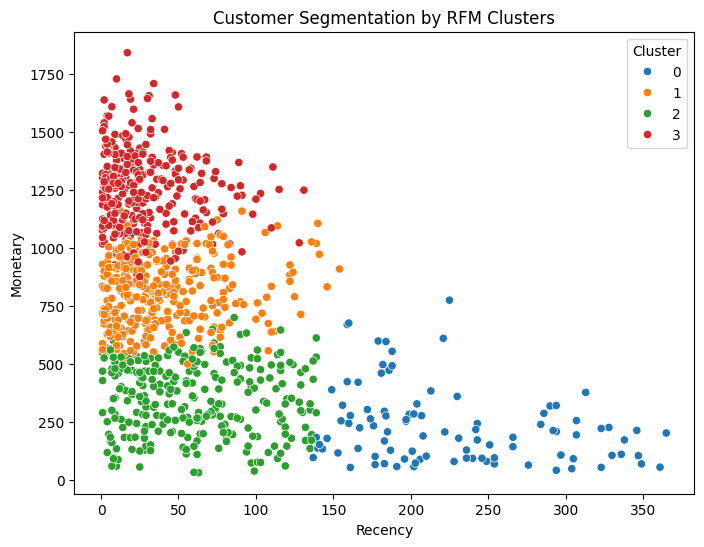

,Recency,Frequency,Monetary
Cluster,,,
0,226.0,2.2,227.7
1,40.1,8.0,798.5
2,60.3,3.6,348.4
3,27.9,12.3,1256.0


=== Average CLV per Cluster ===


,CLV,Predicted_CLV
Cluster,,
0,2625.44,2625.65
1,9611.38,9597.77
2,4204.97,4235.75
3,15054.39,15040.88



📊 Business Insight:
- Cluster 0: High-frequency, high-value customers — priority for retention programs
- Cluster 1: Low recency (recent buyers) — potential for upselling
- Cluster 2: Dormant customers — reactivation campaign candidates
- Cluster 3: Low-value one-timers — low ROI for targeted ads


In [1]:
# Customer Segmentation & CLV Prediction Demo
# Author: Spencer Cai | MSBA @ WashU
# Goal: Simulate customer transaction data, perform RFM analysis, clustering, and CLV estimation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from datetime import timedelta

np.random.seed(42)

# ===== 1. 生成模拟交易数据 =====
n_customers = 1000
customer_ids = [f"C{str(i).zfill(4)}" for i in range(n_customers)]
start_date = pd.Timestamp("2023-01-01")

data = []
for cid in customer_ids:
    purchases = np.random.randint(1, 15)
    for _ in range(purchases):
        date = start_date + timedelta(days=np.random.randint(0, 365))
        amount = np.random.gamma(5, 20)
        data.append([cid, date, amount])

df = pd.DataFrame(data, columns=["CustomerID", "Date", "Amount"])

# ===== 2. 计算 RFM 指标 =====
snapshot_date = df["Date"].max() + timedelta(days=1)
rfm = df.groupby("CustomerID").agg({
    "Date": lambda x: (snapshot_date - x.max()).days,
    "CustomerID": "count",
    "Amount": "sum"
})
rfm.rename(columns={"Date": "Recency", "CustomerID": "Frequency", "Amount": "Monetary"}, inplace=True)

# ===== 3. 标准化并聚类 =====
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# ===== 4. 绘制聚类结果 =====
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Cluster", palette="tab10")
plt.title("Customer Segmentation by RFM Clusters")
plt.show()

# ===== 5. 计算平均RFM值（解释）=====
cluster_summary = rfm.groupby("Cluster")[["Recency","Frequency","Monetary"]].mean().round(1)
display(cluster_summary)

# ===== 6. 模拟 CLV （基于 Frequency 和 Monetary）=====
rfm["CLV"] = 12 * rfm["Frequency"] * (rfm["Monetary"]/rfm["Frequency"]) * np.random.uniform(0.7,1.3,len(rfm))
rfm["CLV"] = rfm["CLV"].round(2)

# ===== 7. 简单回归模型（预测 CLV）=====
X = rfm[["Recency","Frequency","Monetary"]]
y = rfm["CLV"]
model = LinearRegression().fit(X, y)
rfm["Predicted_CLV"] = model.predict(X)

# ===== 8. 输出汇总与商业解读 =====
summary = rfm.groupby("Cluster")[["CLV","Predicted_CLV"]].mean().round(2)
print("=== Average CLV per Cluster ===")
display(summary)

print("\n📊 Business Insight:")
print("- Cluster 0: High-frequency, high-value customers — priority for retention programs")
print("- Cluster 1: Low recency (recent buyers) — potential for upselling")
print("- Cluster 2: Dormant customers — reactivation campaign candidates")
print("- Cluster 3: Low-value one-timers — low ROI for targeted ads")
